In [1]:
import os
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os 
# importing geopy library and Nominatim class
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut 
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
from shapely.geometry import Point
from shapely.ops import nearest_points

/Users/roosfens/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
#pip install openpyxl

## First steps: 

In [3]:
# Inladen van dataset 
# data bestaat alleen uit Noord-Holland en Flevoland. 
# dataset is opgeschoond door kommas weg te halen bij Katholiek & protestands en bij .nl 
bestandpad = pd.read_csv("duodata01.csv", header=None)
bestandpad.head()

,0
0,PROVINCIE;BEVOEGD GEZAG NUMMER;INSTELLINGSCODE...
1,Flevoland;30357;26RK;26RK00;RK Basisschool De ...
2,Flevoland;30709;23FD;23FD01;Shri Laksmi School...
3,Flevoland;40077;24EJ;24EJ00;Islamitische Basis...
4,Flevoland;40077;28BL;28BL00;Al-Ihsaan;Schor;7;...


In [4]:
# Leesbaar maken van dataset 
file_path = 'duodata01.csv'
data = pd.read_csv(file_path, delimiter=';')
print(data.head())

   PROVINCIE  BEVOEGD GEZAG NUMMER INSTELLINGSCODE VESTIGINGSCODE  \
0  Flevoland                 30357            26RK         26RK00   
1  Flevoland                 30709            23FD         23FD01   
2  Flevoland                 40077            24EJ         24EJ00   
3  Flevoland                 40077            28BL         28BL00   
4  Flevoland                 40114            12PM         12PM00   

                     VESTIGINGSNAAM       STRAATNAAM HUISNUMMER-TOEVOEGING  \
0      RK Basisschool De Toermalijn             Jade                    49   
1                Shri Laksmi School    Regentesseweg                     1   
2  Islamitische Basisschool Al Iman  Harderwijkoever                     3   
3                         Al-Ihsaan            Schor                     7   
4                Basisschool De Ark        Middenhof                   210   

  POSTCODE PLAATSNAAM  GEMEENTENUMMER  ... RPA-GEBIED NAAM WGR-GEBIED CODE  \
0  3893 EB   ZEEWOLDE              50 

In [5]:
# maken van extra kolom "adress" in dataset 
#filtered_data = data[data['GEMEENTENAAM'].isin(['AMSTERDAM'])]
#filtered_data['ADRESS']= filtered_data['STRAATNAAM'] + ' ' + filtered_data['HUISNUMMER-TOEVOEGING'].astype(str) + ', ' + filtered_data['POSTCODE'] + ' ' + filtered_data['PLAATSNAAM'] 

#print(filtered_data)

# data['ADRESS']= data['STRAATNAAM'] + ' ' + data['HUISNUMMER-TOEVOEGING'].astype(str) + ', ' + data['POSTCODE'] + ' ' + data['PLAATSNAAM']
# print(data)


## Latitude and Longitude 

In [6]:
# deze doet het even niet

In [7]:
# #Berekenen van Latitude en Longitude 
# #calling the Nominatim tool and create Nominatim class --> access to OpenStreetMap's Nominatim service.
# loc = Nominatim(user_agent="Geopy Library")

# latitudes = []
# longitudes = []


# for address in filtered_data['ADRESS']:
#     location = loc.geocode(address)
#     if location:
#         latitudes.append(location.latitude)
#         longitudes.append(location.longitude)
#     else:
#         latitudes.append(None)
#         longitudes.append(None)

# filtered_data['latitude'] = latitudes
# filtered_data['longitude'] = longitudes


# # entering the location name
# getLoc = loc.geocode(data['ADRESS'][0])

# # printing address
# print(getLoc.address)

# # printing latitude and longitude
# print("Latitude = ", getLoc.latitude, "\n")
# print("Longitude = ", getLoc.longitude)

In [8]:
# Zorg ervoor dat je 'filtered_data' hebt gedefinieerd als een pandas DataFrame
# Example: filtered_data = pd.DataFrame({'ADRESS': ['Address1', 'Address2']})

# Initialiseer de Nominatim-geocoder
#loc = Nominatim(user_agent="Geopy_Library", timeout=10)  # Timeout verhoogd naar 10 seconden

#latitudes = []
#longitudes = []

#def geocode_address(address):
    #"""Probeer een adres te geocoderen met foutafhandeling en retries."""
    #try:
        #location = loc.geocode(address)
        #return location
    #except GeocoderTimedOut:
        #print(f"Timeout voor adres: {address}. Opnieuw proberen...")
        #return geocode_address(address)  # Probeer opnieuw bij timeout
    #except Exception as e:
        #print(f"Fout bij geocoderen van {address}: {e}")
        #return None

#for address in filtered_data['ADRESS']:
    # Voeg een vertraging toe om overbelasting van de server te voorkomen
    #time.sleep(1)  # Wacht 1 seconde tussen verzoeken

    # Geocode het adres
    #location = geocode_address(address)
    
    # Controleer of er een locatie is gevonden
    #if location:
        #latitudes.append(location.latitude)
        #longitudes.append(location.longitude)
    #else:
        #latitudes.append(None)
        #longitudes.append(None)

# Voeg de resultaten toe aan de DataFrame
#filtered_data['latitude'] = latitudes
#filtered_data['longitude'] = longitudes

# Debug output: controleer een voorbeeldadres
# Uncomment voor extra debug informatie
# getLoc = geocode_address(filtered_data['ADRESS'][0])
# if getLoc:
#     print("Address:", getLoc.address)
#     print("Latitude:", getLoc.latitude)
#     print("Longitude:", getLoc.longitude)

# Controleer de uiteindelijke DataFrame
#filtered_data


In [9]:
filtered_data = pd.read_csv('filtered_data1.csv').drop('Unnamed: 0', axis=1)
filtered_data

,PROVINCIE,BEVOEGD GEZAG NUMMER,INSTELLINGSCODE,VESTIGINGSCODE,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER-TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,COROPGEBIED CODE,COROPGEBIED NAAM,ONDERWIJSGEBIED CODE,ONDERWIJSGEBIED NAAM,RMC-REGIO CODE,RMC-REGIO NAAM,VAKANTIEREGIO,ADRESS,latitude,longitude
0,Noord-Holland,20970,04IU,04IU00,ASVO,Frederiksplein,37,1017 XL,AMSTERDAM,363,...,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,Noord,"Frederiksplein 37, 1017 XL AMSTERDAM",52.360848,4.901005
1,Noord-Holland,21464,04JA,04JA00,Basisschool Rosj Pina,Nieuw Herlaer,18-20,1083 BD,AMSTERDAM,363,...,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,Noord,"Nieuw Herlaer 18-20, 1083 BD AMSTERDAM",52.325557,4.887659
2,Noord-Holland,23440,04JS,04JS00,Schoolvereniging Willemspark,Willem Witsenstraat,12,1077 AZ,AMSTERDAM,363,...,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,Noord,"Willem Witsenstraat 12, 1077 AZ AMSTERDAM",52.351090,4.869806
3,Noord-Holland,28614,07JK,07JK00,Eerste Openluchtschool voor het Gezonde Kind,Cliostraat,40,1077 KJ,AMSTERDAM,363,...,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,Noord,"Cliostraat 40, 1077 KJ AMSTERDAM",52.347820,4.874398
4,Noord-Holland,28614,08VA,08VA00,Tweede Openluchtschool voor het Gezonde Kind,Fred. Roeskestraat,76,1076 ED,AMSTERDAM,363,...,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,Noord,"Fred. Roeskestraat 76, 1076 ED AMSTERDAM",52.341726,4.863804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Noord-Holland,81810,07XC,07XC00,Hildebrand Van Loonschool,Hondecoeterstraat,6,1071 LR,AMSTERDAM,363,...,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,Noord,"Hondecoeterstraat 6, 1071 LR AMSTERDAM",52.354620,4.877676
199,Noord-Holland,94433,08CB,08CB00,Vrije Schoolgemeenschap Geert Groote School,Hygieaplein,47,1076 RS,AMSTERDAM,363,...,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,Noord,"Hygieaplein 47, 1076 RS AMSTERDAM",52.347723,4.864429
200,Noord-Holland,94433,09DD,09DD00,Geert Groote School,Fred. Roeskestraat,82,1076 ED,AMSTERDAM,363,...,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,Noord,"Fred. Roeskestraat 82, 1076 ED AMSTERDAM",52.341738,4.862802
201,Noord-Holland,94433,32BG,32BG00,Vrije School Thula,Obiplein,115,1094 RB,AMSTERDAM,363,...,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,Noord,"Obiplein 115, 1094 RB AMSTERDAM",52.360467,4.938811


## Defining neighborhood boundaries

In [10]:
#andere manier: met het gebruik van shapefile

In [11]:
pwd

'/Users/roosfens/Library/CloudStorage/OneDrive-Persoonlijk/documenten/UVA/Jaar 5/Afstudeer Project/Python'

In [12]:
#shp_map = gpd.read_file('/Users/roosfens/Library/CloudStorage/OneDrive-Persoonlijk/documenten/UVA/Jaar 5/Afstudeer Project/Python/cbsgebiedsindelingen2024.gpkg', layer='buurt_gegeneraliseerd')
shp_map = gpd.read_file('/Users/roosfens/Library/CloudStorage/OneDrive-Persoonlijk/documenten/UVA/Jaar 5/Afstudeer Project/Python/cbsgebiedsindelingen2023.gpkg', layer='buurt_gegeneraliseerd')
shp_map.head()

,statcode,jrstatcode,statnaam,gm_code,rubriek,id,geometry
0,BU00340101,2023BU00340101,Centrum Haven Noord,GM0034,buurt,1,"MULTIPOLYGON (((143508.204 483344.282, 143707...."
1,BU00340102,2023BU00340102,Centrum Haven Zuid,GM0034,buurt,2,"MULTIPOLYGON (((143728.650 483029.012, 143730...."
2,BU00340201,2023BU00340201,Rozenwerf en Tuinderswerf,GM0034,buurt,3,"MULTIPOLYGON (((144118.020 483591.859, 144295...."
3,BU00340202,2023BU00340202,Achterwerf,GM0034,buurt,4,"MULTIPOLYGON (((144427.109 483263.953, 144384...."
4,BU00340203,2023BU00340203,Goedewerf en Wittewerf,GM0034,buurt,5,"MULTIPOLYGON (((144267.821 483312.403, 144090...."


In [13]:
#adjust epsg
shp_map = shp_map.to_crs('EPSG:4289')
shp_map.crs

<Geographic 2D CRS: EPSG:4289>
Name: Amersfoort
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [14]:
#neighborhood shp of amsterdam
shp_ams = shp_map[shp_map['gm_code'] == 'GM0363'].reset_index(drop=True)
shp_ams.head()

,statcode,jrstatcode,statnaam,gm_code,rubriek,id,geometry
0,BU0363AA01,2023BU0363AA01,Planciusbuurt-Noord,GM0363,buurt,9737,"MULTIPOLYGON (((4.88611 52.38918, 4.88443 52.3..."
1,BU0363AA02,2023BU0363AA02,Westelijke eilanden,GM0363,buurt,9738,"MULTIPOLYGON (((4.89054 52.38341, 4.89051 52.3..."
2,BU0363AA03,2023BU0363AA03,Westerdokseiland,GM0363,buurt,9739,"MULTIPOLYGON (((4.89660 52.38666, 4.89913 52.3..."
3,BU0363AA04,2023BU0363AA04,Planciusbuurt-Zuid,GM0363,buurt,9740,"MULTIPOLYGON (((4.88443 52.38668, 4.88428 52.3..."
4,BU0363AA05,2023BU0363AA05,Haarlemmerbuurt-West,GM0363,buurt,9741,"MULTIPOLYGON (((4.89051 52.38338, 4.88879 52.3..."


In [15]:
# identifiseren buurt
#pois_at_sch['geometry'] = [Point (xy) for xy in zip(pois_at_sch['shape_pt_lon'], shapes_rtm_bus['shape_pt_lat'])]
geometry = shp_ams['geometry']

#gdf_rtm = gdf_rtm.to_crs('EPSG:4289')
#crs = {'init' :'EPSG:4289'} #EPSG for NL (geodetic: 4298; cartesioan: 28992)
#crs = buurt_id.crs
crs = shp_ams.crs
gdf = gpd.GeoDataFrame(filtered_data, crs=crs, geometry=geometry)

#grid_buurt = gpd.sjoin(gdf, shp_ams, op='within')
filtered_data = gpd.sjoin(gdf, shp_ams, how='inner', op='intersects')
filtered_data = pd.DataFrame(filtered_data).reset_index(drop=True)
filtered_data = filtered_data.drop_duplicates(['VESTIGINGSNAAM'], keep='first').reset_index(drop=True)
filtered_data.head()

/Users/roosfens/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,PROVINCIE,BEVOEGD GEZAG NUMMER,INSTELLINGSCODE,VESTIGINGSCODE,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER-TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,latitude,longitude,geometry,index_right,statcode,jrstatcode,statnaam,gm_code,rubriek,id
0,Noord-Holland,20970,04IU,04IU00,ASVO,Frederiksplein,37,1017 XL,AMSTERDAM,363,...,52.360848,4.901005,"MULTIPOLYGON (((4.88611 52.38918, 4.88443 52.3...",3,BU0363AA04,2023BU0363AA04,Planciusbuurt-Zuid,GM0363,buurt,9740
1,Noord-Holland,21464,04JA,04JA00,Basisschool Rosj Pina,Nieuw Herlaer,18-20,1083 BD,AMSTERDAM,363,...,52.325557,4.887659,"MULTIPOLYGON (((4.89054 52.38341, 4.89051 52.3...",5,BU0363AA06,2023BU0363AA06,Haarlemmerbuurt-Oost,GM0363,buurt,9742
2,Noord-Holland,23440,04JS,04JS00,Schoolvereniging Willemspark,Willem Witsenstraat,12,1077 AZ,AMSTERDAM,363,...,52.351090,4.869806,"MULTIPOLYGON (((4.89660 52.38666, 4.89913 52.3...",5,BU0363AA06,2023BU0363AA06,Haarlemmerbuurt-Oost,GM0363,buurt,9742
3,Noord-Holland,28614,07JK,07JK00,Eerste Openluchtschool voor het Gezonde Kind,Cliostraat,40,1077 KJ,AMSTERDAM,363,...,52.347820,4.874398,"MULTIPOLYGON (((4.88443 52.38668, 4.88428 52.3...",6,BU0363AB01,2023BU0363AB01,Marnixbuurt-Noord,GM0363,buurt,9743
4,Noord-Holland,28614,08VA,08VA00,Tweede Openluchtschool voor het Gezonde Kind,Fred. Roeskestraat,76,1076 ED,AMSTERDAM,363,...,52.341726,4.863804,"MULTIPOLYGON (((4.89051 52.38338, 4.88879 52.3...",17,BU0363AC01,2023BU0363AC01,Langestraat e.o.,GM0363,buurt,9754


In [16]:
len(filtered_data)

201

In [17]:
# nieuw dataframe maken met alleen school en buurt 
df = filtered_data[['VESTIGINGSNAAM', 'statnaam', 'statcode', 'VESTIGINGSCODE']].copy()
df.columns = ['school' , 'neighborhood', 'statcode', 'locationcode']
df.head()

,school,neighborhood,statcode,locationcode
0,ASVO,Planciusbuurt-Zuid,BU0363AA04,04IU00
1,Basisschool Rosj Pina,Haarlemmerbuurt-Oost,BU0363AA06,04JA00
2,Schoolvereniging Willemspark,Haarlemmerbuurt-Oost,BU0363AA06,04JS00
3,Eerste Openluchtschool voor het Gezonde Kind,Marnixbuurt-Noord,BU0363AB01,07JK00
4,Tweede Openluchtschool voor het Gezonde Kind,Langestraat e.o.,BU0363AC01,08VA00


## Senario 1 

In [18]:
pwd

'/Users/roosfens/Library/CloudStorage/OneDrive-Persoonlijk/documenten/UVA/Jaar 5/Afstudeer Project/Python'

In [19]:
# inladen dataset van CBS - kerncijfers wijken en buurten 
#file_path = 'kwb-2024.xlsx'
#data = pd.read_excel(file_path)  # Geen delimiter nodig
file_path = 'kwb-2024.csv'
data = pd.read_csv(file_path)  # Geen delimiter nodig
data = data[data['recs'] == 'Buurt'].reset_index(drop=True)
data = data[data['gm_naam'] == 'Amsterdam'].reset_index(drop=True)
data.head()

/var/folders/c4/d1hjy4hs55z494dzspybl0br0000gn/T/ipykernel_6941/198474067.py:5: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)  # Geen delimiter nodig


,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
0,BU0363AA01,0363AA01,Planciusbuurt-Noord,Amsterdam,Buurt,BU0363AA01,1,345,185,160,...,.,.,.,2,2,1,1013,1,1,8817
1,BU0363AA02,0363AA02,Westelijke eilanden,Amsterdam,Buurt,BU0363AA02,1,2895,1375,1520,...,.,.,.,22,15,6,1013,1,1,7873
2,BU0363AA03,0363AA03,Westerdokseiland,Amsterdam,Buurt,BU0363AA03,1,1850,945,900,...,.,.,.,34,16,18,1013,1,1,6858
3,BU0363AA04,0363AA04,Planciusbuurt-Zuid,Amsterdam,Buurt,BU0363AA04,1,160,80,80,...,.,.,.,2,1,0,1013,1,1,9087
4,BU0363AA05,0363AA05,Haarlemmerbuurt-West,Amsterdam,Buurt,BU0363AA05,1,2410,1220,1190,...,.,.,.,12,11,1,1013,1,1,9665


In [20]:
# df met alle info Amsterdam 
data[data['gm_naam'].isin(['Amsterdam'])].copy()

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
0,BU0363AA01,0363AA01,Planciusbuurt-Noord,Amsterdam,Buurt,BU0363AA01,1,345,185,160,...,.,.,.,2,2,1,1013,1,1,8817
1,BU0363AA02,0363AA02,Westelijke eilanden,Amsterdam,Buurt,BU0363AA02,1,2895,1375,1520,...,.,.,.,22,15,6,1013,1,1,7873
2,BU0363AA03,0363AA03,Westerdokseiland,Amsterdam,Buurt,BU0363AA03,1,1850,945,900,...,.,.,.,34,16,18,1013,1,1,6858
3,BU0363AA04,0363AA04,Planciusbuurt-Zuid,Amsterdam,Buurt,BU0363AA04,1,160,80,80,...,.,.,.,2,1,0,1013,1,1,9087
4,BU0363AA05,0363AA05,Haarlemmerbuurt-West,Amsterdam,Buurt,BU0363AA05,1,2410,1220,1190,...,.,.,.,12,11,1,1013,1,1,9665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,BU0363TL04,0363TL04,Reigersbos 4,Amsterdam,Buurt,BU0363TL04,1,2540,1245,1295,...,.,.,.,63,58,5,1107,1,2,2149
513,BU0363TM01,0363TM01,Gein 1,Amsterdam,Buurt,BU0363TM01,1,2960,1440,1520,...,.,.,.,32,31,1,1106,1,2,2462
514,BU0363TM02,0363TM02,Gein 2,Amsterdam,Buurt,BU0363TM02,1,1645,785,860,...,.,.,.,18,17,1,1107,1,1,2589
515,BU0363TM03,0363TM03,Gein 3,Amsterdam,Buurt,BU0363TM03,1,3200,1635,1565,...,.,.,.,65,63,1,1106,1,2,1584


# ----------------------------------------------------------------------------


## Merge alle kolommen van school, buurt, bevolkingsverdeling

In [21]:
# uit dataframe filtered_data de kolommen vestigingsnaam en buurt halen en kopie in df opslaan
# vervolgens kolomnamen hernoemen naar school en neighborhood 
# nieuwe df2 maken door alleen die rijen van de DataFrame data te selecteren waarin de waarde in de kolom 'gm_naam' gelijk is aan 'Almere'
df = filtered_data[['VESTIGINGSNAAM', 'statnaam', 'statcode', 'VESTIGINGSCODE']].copy()
#df = df[['VESTIGINGSNAAM', 'statnaam', 'statcode', 'VESTIGINGSCODE']]
df.columns = ['school', 'neighborhood', 'statcode', 'locationcode']
df2 = data[data['gm_naam'].isin(['Amsterdam'])].copy()

#nieuwe kolommen aanmaken en som van variabele gebruiken  
df2['n_western'] = df2['a_nl_all'] + df2['a_eur_al']
df2['n_nonwestern'] = df2['a_neu_al']
df2['n_population'] = df2['a_inw'] 
df2['p_western'] = (df2['n_western'] / df2['n_population']) * 100
df2['p_nonwestern'] = (df2['n_nonwestern'] / df2['n_population']) * 100
df2['statcode'] = df2['gwb_code_10']


# merge: 
# kolom neighborhood wordt key (left_on), regio wordt key (right_on), how=left left join wat betekent dat alle rijen uit df behouden blijven 
# na merge wordt regio kolom verwijderd uit df omdat het niet meer nodig is 
#df = df.merge(df2[['regio', 'n_w', 'n_nw', 'n_pop', 'p_w', 'p_nw']], left_on='Neighborhood', right_on='regio', how='left')
df = pd.merge(df, df2[['statcode', 'n_western', 'n_nonwestern', 'n_population', 'p_western', 'p_nonwestern']], on='statcode')
#df = df.drop(columns=['regio'])
df

#print(df.head())


,school,neighborhood,statcode,locationcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern
0,ASVO,Planciusbuurt-Zuid,BU0363AA04,04IU00,110,50,160,68.750000,31.250000
1,Basisschool Rosj Pina,Haarlemmerbuurt-Oost,BU0363AA06,04JA00,1150,375,1520,75.657895,24.671053
2,Schoolvereniging Willemspark,Haarlemmerbuurt-Oost,BU0363AA06,04JS00,1150,375,1520,75.657895,24.671053
3,Eerste Openluchtschool voor het Gezonde Kind,Marnixbuurt-Noord,BU0363AB01,07JK00,1010,470,1480,68.243243,31.756757
4,Tweede Openluchtschool voor het Gezonde Kind,Langestraat e.o.,BU0363AC01,08VA00,1470,450,1920,76.562500,23.437500
...,...,...,...,...,...,...,...,...,...
196,Hildebrand Van Loonschool,Louis Crispijnbuurt,BU0363FN01,07XC00,1545,1765,3310,46.676737,53.323263
197,Vrije Schoolgemeenschap Geert Groote School,Louis Crispijnbuurt,BU0363FN01,08CB00,1545,1765,3310,46.676737,53.323263
198,Geert Groote School,Rembrandtpark-Noord,BU0363FM03,09DD00,780,230,1015,76.847291,22.660099
199,Vrije School Thula,Jacob Geelbuurt,BU0363FL03,32BG00,950,2075,3025,31.404959,68.595041


In [22]:
df

,school,neighborhood,statcode,locationcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern
0,ASVO,Planciusbuurt-Zuid,BU0363AA04,04IU00,110,50,160,68.750000,31.250000
1,Basisschool Rosj Pina,Haarlemmerbuurt-Oost,BU0363AA06,04JA00,1150,375,1520,75.657895,24.671053
2,Schoolvereniging Willemspark,Haarlemmerbuurt-Oost,BU0363AA06,04JS00,1150,375,1520,75.657895,24.671053
3,Eerste Openluchtschool voor het Gezonde Kind,Marnixbuurt-Noord,BU0363AB01,07JK00,1010,470,1480,68.243243,31.756757
4,Tweede Openluchtschool voor het Gezonde Kind,Langestraat e.o.,BU0363AC01,08VA00,1470,450,1920,76.562500,23.437500
...,...,...,...,...,...,...,...,...,...
196,Hildebrand Van Loonschool,Louis Crispijnbuurt,BU0363FN01,07XC00,1545,1765,3310,46.676737,53.323263
197,Vrije Schoolgemeenschap Geert Groote School,Louis Crispijnbuurt,BU0363FN01,08CB00,1545,1765,3310,46.676737,53.323263
198,Geert Groote School,Rembrandtpark-Noord,BU0363FM03,09DD00,780,230,1015,76.847291,22.660099
199,Vrije School Thula,Jacob Geelbuurt,BU0363FL03,32BG00,950,2075,3025,31.404959,68.595041


In [23]:
# leerlingen[leerlingen['vestigingscode'].isin(df['vestigingscode'])]

In [24]:
# open nieuwe dataset over leerlingen van scholen en gebruik daarbij alleen Almere
file_path = 'duodata02.csv'
students = pd.read_csv(file_path, delimiter=';', encoding='latin-1')
students = students[students['vestiging_gemeentenaam']== 'AMSTERDAM']
students.head()


,instellingscode,vestigingscode,naam_vestiging,soort_vestiging,denominatie_vestiging,bevoegd_gezag_nummer,vestiging_gemeentecode,vestiging_gemeentenaam,leerlingen.1996,leerlingen.1997,...,leerlingen.2014,leerlingen.2015,leerlingen.2016,leerlingen.2017,leerlingen.2018,leerlingen.2019,leerlingen.2020,leerlingen.2021,leerlingen.2022,leerlingen.2023
26,00DE,00DE00,Platoschool,BO,Algemeen bijzonder,30116,0363,AMSTERDAM,184,165,...,0,0,0,0,0,0,0,0,0,0
47,00FL,00FL00,Apolloschool voor VBO,VSO,Rooms-Katholiek,40569,0363,AMSTERDAM,42,41,...,0,0,0,0,0,0,0,0,0,0
373,01JZ,01JZ00,SSBO Parnassia,SO,Algemeen bijzonder,30781,0363,AMSTERDAM,0,0,...,0,0,0,0,0,0,0,0,0,0
374,01JZ,01JZ00,SSBO Parnassia,SO/VSO,Algemeen bijzonder,30781,0363,AMSTERDAM,28,26,...,0,0,0,0,0,0,0,0,0,0
476,01VF,01VF00,SBO Professor Dumont,SBO,Algemeen bijzonder,77690,0363,AMSTERDAM,10,10,...,69,77,65,78,103,120,115,106,124,122


In [25]:
# Hiermee kan je de kolommen van een dataframe zien 
# leerlingen.columns

In [26]:
# Hiermee kan je de kolommen van een dataframe zien 
#df_schools.columns

In [27]:
# maak nieuw dataframe genaamd leerlingen_df van het dataframe 'leerlingen' en pak daar onderstaande kolommen van en hernoem ze. 
students_df = students[['naam_vestiging' , 'vestigingscode' , 'leerlingen.2023']]
students_df.columns = ['school' , 'locationcode' , 'students']
students_df

,school,locationcode,students
26,Platoschool,00DE00,0
47,Apolloschool voor VBO,00FL00,0
373,SSBO Parnassia,01JZ00,0
374,SSBO Parnassia,01JZ00,0
476,SBO Professor Dumont,01VF00,122
...,...,...,...
10063,Kindcentrum De Baanbreker,31VR00,35
10084,IKC Cadans Weesp,32AH00,19
10088,De Dadelpalm,32AT00,121
10095,Vrije School Thula,32BG00,197


## Dataframe df_schools: met scholen en leerlingen en verdeling: 

In [28]:
# Berekening:  n_std_western =Total_Students * (p_w / 100)
# Berekening: n_std_nonwestern = Total_studens * (p_nw / 100) 

# Stap 1: Maak een dataset met scholen en hun buurt
students_df = students[['naam_vestiging' , 'vestigingscode' , 'leerlingen.2023']]
students_df.columns = ['school' , 'locationcode' , 'students']
students_df = students_df[students_df['students'] != '<5'].reset_index(drop=True)


# Stap 2: Voeg het percentage westerse bevolking toe aan de dataset
#df_schools = pd.merge(leerlingen_df , df , on='School')
scenario_1 = pd.merge(students_df.drop('school', axis=1) , df , on='locationcode')

scenario_1['students']=scenario_1['students'].astype(float)

# Stap 3: Bereken het aantal westerse studenten
scenario_1['n_std_western'] = scenario_1['students'] * (scenario_1['p_western'] / 100)
scenario_1['n_std_nonwestern'] = scenario_1['students'] * (scenario_1['p_nonwestern'] / 100)

# Resultaat bekijken
#print(df_schools[['school', 'neighborhood', 'leerlingen', 'n_std_western' , 'n_std_nonwestern']].head())
scenario_1


,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern
0,04IU00,319.0,ASVO,Planciusbuurt-Zuid,BU0363AA04,110,50,160,68.750000,31.250000,219.312500,99.687500
1,04JA00,330.0,Basisschool Rosj Pina,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,249.671053,81.414474
2,04JS00,218.0,Schoolvereniging Willemspark,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,164.934211,53.782895
3,04LA00,252.0,Oecumenische daltonschool De Rivieren,Meerwaldtbuurt,BU0363FD03,555,1385,1945,28.534704,71.208226,71.907455,179.444730
4,05FR00,227.0,Basisschool Het Wespennest,Lastage,BU0363AF02,850,260,1120,75.892857,23.214286,172.276786,52.696429
...,...,...,...,...,...,...,...,...,...,...,...,...
193,31VE00,131.0,IBS Elif Noord,Van Tijenbuurt,BU0363FB05,975,1980,2955,32.994924,67.005076,43.223350,87.776650
194,31VR00,35.0,Kindcentrum De Baanbreker,Utrechtsebuurt-Zuid,BU0363AH04,895,320,1220,73.360656,26.229508,25.676230,9.180328
195,32AH00,19.0,IKC Cadans Weesp,Sloterpark,BU0363FE04,0,0,0,NaN,NaN,NaN,NaN
196,32AT00,121.0,De Dadelpalm,Confuciusbuurt,BU0363FC03,1120,2865,3985,28.105395,71.894605,34.007528,86.992472


In [29]:
# # maak datafile aan van je eigen gevonden gegevens 
# scenario_1.to_csv('scenario_1 Ams.csv')


In [30]:
abs((253.945946/scenario_1['n_std_western'].sum() - (153.621622/scenario_1['n_std_nonwestern'].sum())))

0.0009644316520026498

## Dissimilarity Index

In [31]:
# Maak een functie om de Dissimilarity Index per school te berekenen
# row = gegeves v 1 school uit 1 rij van dataset]
# total_western = totaal aantal westerse studenten over alle scholen 
# total_nonwestern = totaal aantal niet westerse studenten over alle scholen 
def compute_di_per_school(row, total_western, total_nonwestern):
    
    # aandeel westerse studenten van deze school ten opzichte van het totaal
    school_western_ratio = row["n_std_western"] / total_western
    # Het aandeel niet-westerse studenten van deze school ten opzichte van het totaal
    school_nonwestern_ratio = row["n_std_nonwestern"] / total_nonwestern
    # formule toepassen 
    return 0.5 * abs(school_western_ratio - school_nonwestern_ratio)

# Totale waarden voor alle scholen (kolom ophalen, aantal westerse studenten per school en dan .sum() voor alle waarde in kolom optellen en samenpakken 
total_western = scenario_1["n_std_western"].sum()
total_nonwestern = scenario_1["n_std_nonwestern"].sum()

# Bereken de DI per school en voeg deze toe als een nieuwe kolom
# Apply functie past compute_di_per_school toe op elke rij van DF , exis=1 zorgt dat het per rij wordt gedaan (school voor school) 
# Args=(total_western, total_nonwestern): extra argumenten doorgeven aan functie. Nodig om verhouding studenten te berekenen 
scenario_1["dissimilarity_index"] = scenario_1.apply(
    compute_di_per_school, axis=1, args=(total_western, total_nonwestern)
)

# Toon de resultaten
print(scenario_1[["school", "dissimilarity_index"]])


                                    school  dissimilarity_index
0                                     ASVO             0.000459
1                    Basisschool Rosj Pina             0.001374
2             Schoolvereniging Willemspark             0.000908
3    Oecumenische daltonschool De Rivieren             0.003745
4               Basisschool Het Wespennest             0.001040
..                                     ...                  ...
193                         IBS Elif Noord             0.001718
194              Kindcentrum De Baanbreker             0.000120
195                       IKC Cadans Weesp                  NaN
196                           De Dadelpalm             0.001828
197                     Vrije School Thula             0.002711

[198 rows x 2 columns]


In [32]:
#schools with NaN dissimilarity index
len(scenario_1[scenario_1['dissimilarity_index'].isna()])

10

In [33]:
scenario_1[scenario_1['dissimilarity_index'].isna()]

,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern,dissimilarity_index
13,07RC00,214.0,Peetersschool,Sloterpark,BU0363FE04,0,0,0,NaN,NaN,NaN,NaN,NaN
33,12GF00,221.0,Polsstok,Zaanstraat emplacement,BU0363EB03,0,0,0,NaN,NaN,NaN,NaN,NaN
98,20TQ00,212.0,Rosa Boekdrukker,Minervahaven-Zuidwest,BU0363BB05,0,0,0,NaN,NaN,NaN,NaN,NaN
101,20TT00,377.0,Basisschool Het Winterkoninkje 2e Montessori-S...,Minervahaven-Zuidwest,BU0363BB05,0,0,0,NaN,NaN,NaN,NaN,NaN
129,20ZD00,227.0,De Poolster,Vondelpark-Oost,BU0363KD01,0,0,0,NaN,NaN,NaN,NaN,NaN
130,20ZE00,269.0,Fusieschool De Vier Windstreken / Zeven zeeën,Vondelpark-Oost,BU0363KD01,0,0,0,NaN,NaN,NaN,NaN,NaN
133,20ZR00,294.0,Montessorischool Boven 't IJ,Bretten-West,BU0363FA06,0,0,0,NaN,NaN,NaN,NaN,NaN
134,20ZT00,407.0,Montessorischool Azalea,Bretten-West,BU0363FA06,0,0,0,NaN,NaN,NaN,NaN,NaN
135,20ZV00,572.0,OBS Twiske,Bretten-West,BU0363FA06,0,0,0,NaN,NaN,NaN,NaN,NaN
195,32AH00,19.0,IKC Cadans Weesp,Sloterpark,BU0363FE04,0,0,0,NaN,NaN,NaN,NaN,NaN


In [34]:
scenario_1[scenario_1['school']=='IBS Elif Noord']

,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern,dissimilarity_index
193,31VE00,131.0,IBS Elif Noord,Van Tijenbuurt,BU0363FB05,975,1980,2955,32.994924,67.005076,43.22335,87.77665,0.001718


In [35]:
students_df[students_df['school']=='IBS Elif Noord']

,school,locationcode,students
365,IBS Elif Noord,31VE00,131


In [36]:
data[data['regio'] == 'Bretten-West']

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
158,BU0363FA06,0363FA06,Bretten-West,Amsterdam,Buurt,BU0363FA06,1,0,0,0,...,.,.,.,149,127,23,1046,1,5,205


The dissimilarity index of IBS Elif Noord is NaN because the neighbourhood it is located doesn't have any resident. It could be the same case as well for another school with NaN values.

In [37]:
scenario_1

,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern,dissimilarity_index
0,04IU00,319.0,ASVO,Planciusbuurt-Zuid,BU0363AA04,110,50,160,68.750000,31.250000,219.312500,99.687500,0.000459
1,04JA00,330.0,Basisschool Rosj Pina,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,249.671053,81.414474,0.001374
2,04JS00,218.0,Schoolvereniging Willemspark,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,164.934211,53.782895,0.000908
3,04LA00,252.0,Oecumenische daltonschool De Rivieren,Meerwaldtbuurt,BU0363FD03,555,1385,1945,28.534704,71.208226,71.907455,179.444730,0.003745
4,05FR00,227.0,Basisschool Het Wespennest,Lastage,BU0363AF02,850,260,1120,75.892857,23.214286,172.276786,52.696429,0.001040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,31VE00,131.0,IBS Elif Noord,Van Tijenbuurt,BU0363FB05,975,1980,2955,32.994924,67.005076,43.223350,87.776650,0.001718
194,31VR00,35.0,Kindcentrum De Baanbreker,Utrechtsebuurt-Zuid,BU0363AH04,895,320,1220,73.360656,26.229508,25.676230,9.180328,0.000120
195,32AH00,19.0,IKC Cadans Weesp,Sloterpark,BU0363FE04,0,0,0,NaN,NaN,NaN,NaN,NaN
196,32AT00,121.0,De Dadelpalm,Confuciusbuurt,BU0363FC03,1120,2865,3985,28.105395,71.894605,34.007528,86.992472,0.001828


In [38]:
# maak datafile aan van je eigen gevonden gegevens 
#scenario_1.to_csv('scenario_1 Ams.csv')


##  Segregatie level op scholen in Amterdam, gebaseerd op DI 

In [39]:
print('Segregation level at schools in Amsterdam based on Dissimilarity Index:', scenario_1['dissimilarity_index'].sum())

Segregation level at schools in Amsterdam based on Dissimilarity Index: 0.26468200596932956


In [40]:
# Toon het totale aantal scholen in de DataFrame
print(f"Total number of schools: {len(scenario_1)}")

Total number of schools: 198


In [41]:
merged_new = scenario_1.copy()
merged_new['dissimilarity_index']= merged_new['dissimilarity_index']*100
merged_new

,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern,dissimilarity_index
0,04IU00,319.0,ASVO,Planciusbuurt-Zuid,BU0363AA04,110,50,160,68.750000,31.250000,219.312500,99.687500,0.045907
1,04JA00,330.0,Basisschool Rosj Pina,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,249.671053,81.414474,0.137396
2,04JS00,218.0,Schoolvereniging Willemspark,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,164.934211,53.782895,0.090765
3,04LA00,252.0,Oecumenische daltonschool De Rivieren,Meerwaldtbuurt,BU0363FD03,555,1385,1945,28.534704,71.208226,71.907455,179.444730,0.374514
4,05FR00,227.0,Basisschool Het Wespennest,Lastage,BU0363AF02,850,260,1120,75.892857,23.214286,172.276786,52.696429,0.104045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,31VE00,131.0,IBS Elif Noord,Van Tijenbuurt,BU0363FB05,975,1980,2955,32.994924,67.005076,43.223350,87.776650,0.171799
194,31VR00,35.0,Kindcentrum De Baanbreker,Utrechtsebuurt-Zuid,BU0363AH04,895,320,1220,73.360656,26.229508,25.676230,9.180328,0.011986
195,32AH00,19.0,IKC Cadans Weesp,Sloterpark,BU0363FE04,0,0,0,NaN,NaN,NaN,NaN,NaN
196,32AT00,121.0,De Dadelpalm,Confuciusbuurt,BU0363FC03,1120,2865,3985,28.105395,71.894605,34.007528,86.992472,0.182766


In [42]:
scenario_1_dissimilarity=merged_new[merged_new['school'].isin(merged_new['school'])]
scenario_1_dissimilarity

,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern,dissimilarity_index
0,04IU00,319.0,ASVO,Planciusbuurt-Zuid,BU0363AA04,110,50,160,68.750000,31.250000,219.312500,99.687500,0.045907
1,04JA00,330.0,Basisschool Rosj Pina,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,249.671053,81.414474,0.137396
2,04JS00,218.0,Schoolvereniging Willemspark,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,164.934211,53.782895,0.090765
3,04LA00,252.0,Oecumenische daltonschool De Rivieren,Meerwaldtbuurt,BU0363FD03,555,1385,1945,28.534704,71.208226,71.907455,179.444730,0.374514
4,05FR00,227.0,Basisschool Het Wespennest,Lastage,BU0363AF02,850,260,1120,75.892857,23.214286,172.276786,52.696429,0.104045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,31VE00,131.0,IBS Elif Noord,Van Tijenbuurt,BU0363FB05,975,1980,2955,32.994924,67.005076,43.223350,87.776650,0.171799
194,31VR00,35.0,Kindcentrum De Baanbreker,Utrechtsebuurt-Zuid,BU0363AH04,895,320,1220,73.360656,26.229508,25.676230,9.180328,0.011986
195,32AH00,19.0,IKC Cadans Weesp,Sloterpark,BU0363FE04,0,0,0,NaN,NaN,NaN,NaN,NaN
196,32AT00,121.0,De Dadelpalm,Confuciusbuurt,BU0363FC03,1120,2865,3985,28.105395,71.894605,34.007528,86.992472,0.182766


In [43]:
merged_new_unique = scenario_1_dissimilarity.drop_duplicates('school')
merged_new_unique

,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern,dissimilarity_index
0,04IU00,319.0,ASVO,Planciusbuurt-Zuid,BU0363AA04,110,50,160,68.750000,31.250000,219.312500,99.687500,0.045907
1,04JA00,330.0,Basisschool Rosj Pina,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,249.671053,81.414474,0.137396
2,04JS00,218.0,Schoolvereniging Willemspark,Haarlemmerbuurt-Oost,BU0363AA06,1150,375,1520,75.657895,24.671053,164.934211,53.782895,0.090765
3,04LA00,252.0,Oecumenische daltonschool De Rivieren,Meerwaldtbuurt,BU0363FD03,555,1385,1945,28.534704,71.208226,71.907455,179.444730,0.374514
4,05FR00,227.0,Basisschool Het Wespennest,Lastage,BU0363AF02,850,260,1120,75.892857,23.214286,172.276786,52.696429,0.104045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,31VE00,131.0,IBS Elif Noord,Van Tijenbuurt,BU0363FB05,975,1980,2955,32.994924,67.005076,43.223350,87.776650,0.171799
194,31VR00,35.0,Kindcentrum De Baanbreker,Utrechtsebuurt-Zuid,BU0363AH04,895,320,1220,73.360656,26.229508,25.676230,9.180328,0.011986
195,32AH00,19.0,IKC Cadans Weesp,Sloterpark,BU0363FE04,0,0,0,NaN,NaN,NaN,NaN,NaN
196,32AT00,121.0,De Dadelpalm,Confuciusbuurt,BU0363FC03,1120,2865,3985,28.105395,71.894605,34.007528,86.992472,0.182766


In [44]:
# maak datafile aan van je eigen gevonden gegevens 
merged_new_unique.to_csv('scenario1_amsterdam.csv')

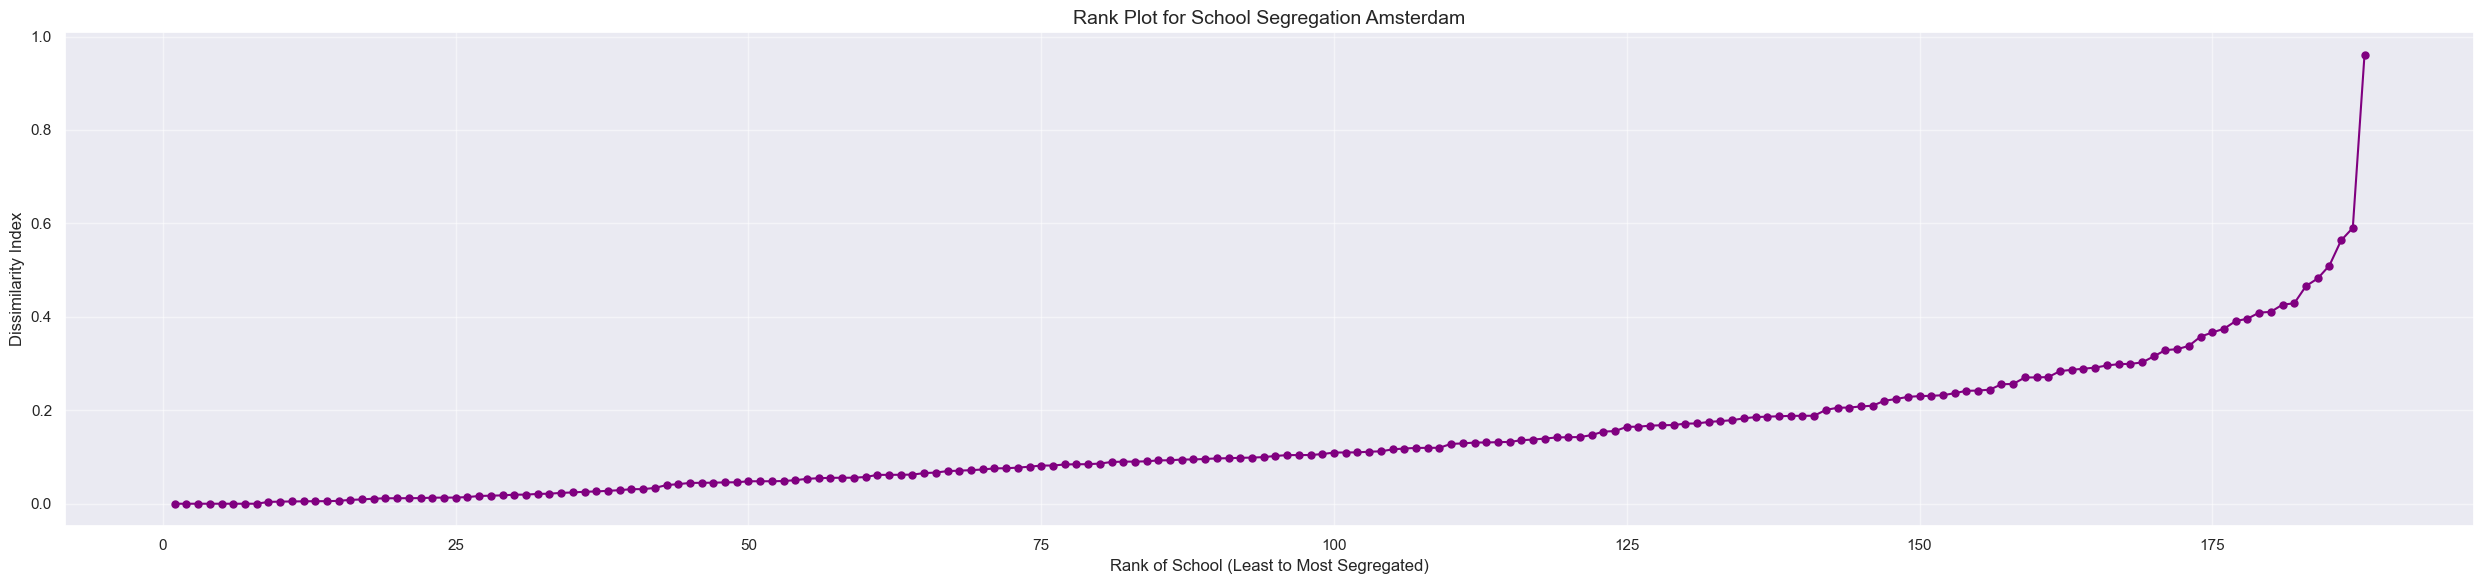

In [45]:
# Sorteren van scholen op basis van de dissimilarity index
scenario_1_dissimilarity = merged_new_unique.sort_values(by='dissimilarity_index', ascending=True)

# Toevoegen van een rank kolom op basis van de gesorteerde waarden
scenario_1_dissimilarity['rank'] = range(1, len(scenario_1_dissimilarity) + 1)

# Plot maken
plt.figure(figsize=(25, 6))
plt.plot(scenario_1_dissimilarity['rank'], scenario_1_dissimilarity['dissimilarity_index'], marker='o', linestyle='-', markersize=5, color = 'purple')

# Assen labels en titel
plt.xlabel('Rank of School (Least to Most Segregated)', fontsize=12)
plt.ylabel('Dissimilarity Index', fontsize=12)
plt.title('Rank Plot for School Segregation Amsterdam', fontsize=14)

# Grid toevoegen voor betere leesbaarheid
plt.grid(alpha=0.5)

# Plot laten zien
plt.tight_layout()
plt.savefig("rank_scenario1_ams.png", dpi=300, bbox_inches='tight')
plt.show()